### More Feature Evaluation

More notes on this can be found in comments within features.py

In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('../BIA660D_Group_1_Project/eda/hoboken_step2.csv')
data.head(3)

,user_rating,user_text,restaurant_name,restaurant_rating,restaurant_price,restaurant_type,review_len,mispelling_count
0,5,We booked Grand Vin as our brunch location to ...,Grand Vin,3.994975,2.0,"['Wine Bars', 'Italian', 'Cocktail Bars']",744,0
1,4,Sooooo for date night it was his turn to pick ...,Grand Vin,4.000000,2.0,"['Wine Bars', 'Italian', 'Cocktail Bars']",1344,0
2,5,Adorable little wine bar with outdoor seating ...,Grand Vin,3.994975,2.0,"['Wine Bars', 'Italian', 'Cocktail Bars']",723,0


OK now lets try to see if there are visible relationships between features and the dependent variable. 

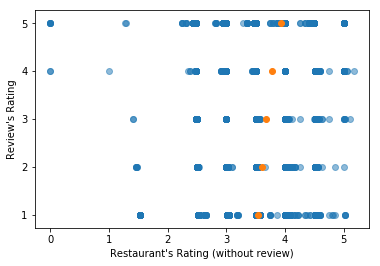

In [10]:
import matplotlib.pyplot as plt 
avg = {}
for i in range(1,6): 
    temp = data['restaurant_rating'][np.where(data['user_rating'] == i)[0]]
    avg[i] = np.mean(temp)
plt.scatter(data['restaurant_rating'], data['user_rating'], alpha = 0.5)
plt.scatter(avg.values(), avg.keys())
plt.xlabel("Restaurant's Rating (without review)")
plt.ylabel("Review's Rating")
plt.show()

As we can see, there is a visible relationship between the existing restaurant rating (the rating it would have if it were calculated excluding the review in question) and the review's rating. The trend is clear and linear but is much more dispersed than one might assume. We can also see that restaurants with a pre-existing rating of 0 (i.e. those restaurants who were not yet rated) tended to be rated favorably in their first reviews. 

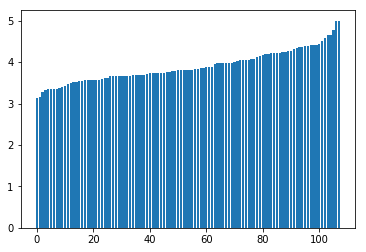

In [22]:
type_to_ratings = pd.read_csv('../BIA660D_Group_1_Project/eda/type_data.csv')
type_to_ratings.sort_values(by='Average_Score', inplace=True)
plt.figure()
plt.bar(range(108), type_to_ratings['Average_Score'])
# plt.xticks(range(108), type_to_ratings.iloc[:,0]) #No need for this, unreadable anyway
plt.show()

Despite not being able to identify any specific restaurant categories, we can see that the category does indeed have an effect on the review that the restaurants get. Since using one-hot-encoding for all these would lead to tons of dummy variables that could have an effect of overfitting, perhaps we can use bagging? We shall see. 

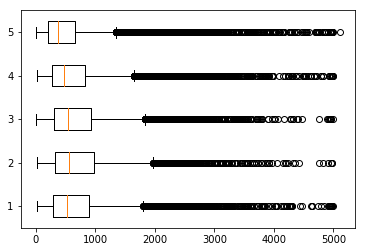

In [27]:
length_to_ratings = data[['review_len', 'user_rating']]
plt.figure()
# plt.scatter(data['review_len'], data['user_rating'])
w_one = list(length_to_ratings['review_len'][np.where(length_to_ratings['user_rating']==1)[0]])
w_two = list(length_to_ratings['review_len'][np.where(length_to_ratings['user_rating']==2)[0]])
w_three = list(length_to_ratings['review_len'][np.where(length_to_ratings['user_rating']==3)[0]])
w_four = list(length_to_ratings['review_len'][np.where(length_to_ratings['user_rating']==4)[0]])
w_five = list(length_to_ratings['review_len'][np.where(length_to_ratings['user_rating']==5)[0]])
all_five = [w_one, w_two, w_three, w_four, w_five]
plt.boxplot(all_five, vert=False)
plt.show()

Unfortunately the trend here isn't as visible, however, the average review length for "average reviews" (2's and 3's) are all longer than the average review length for the rest. Also, the average (and quartiles) for 5-star reviews are lower than any of the others. These are relationships that some non-linear models may be able to pick up. Bagging may be less useful in this instance.